### I want to plot the data points, so I decided to do in R2, it is almost the same proccess in higher dimensions. First lets make some data points, here I made 2 groups of data points which are not sepratable with a hyperplane. So we need to project these points in a higher dimension space where we have more freedom and we can find a hyperplane to seprate these two classes.

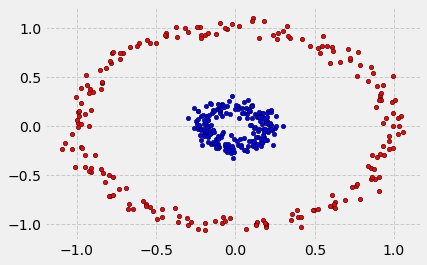

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
%matplotlib inline

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

plt.style.use('fivethirtyeight')
####### part a
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.2, noise=.05)
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
reds = y == 0
blues = y == 1
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.grid(linestyle='--')


### I am going to define a function(matrix) so that the result of applying function on data points would transfer our data points in a new space where we can successfully seprate these 2 classes.

Text(0.5, 1.0, 'My suggested function')

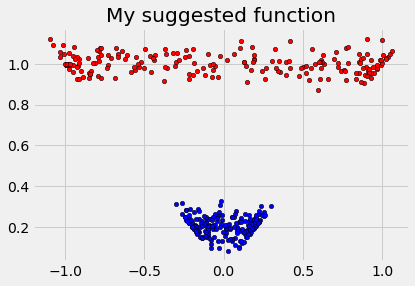

In [2]:
# My own function 
X[:,1] = np.sqrt(X[:,0]**2+X[:,1]**2)   
plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title('My suggested function')

### Let's try another kernel.rbf Kernel(Gaussian)

Text(0.5, 1.0, 'rbf')

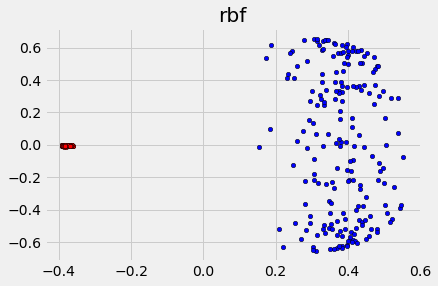

In [3]:
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title('rbf')

### Here I want to try something else, I want to use the gram matrix and train and test the classification and calculate the accuracy of the model. Also let's increase the number of features.

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
X, y = make_classification(n_samples=500,random_state=2,n_informative=10,n_features=40,n_redundant=5)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
clf = svm.SVC(kernel='precomputed')
poly_degree = 1   #polynomial degree for the kernel
# linear kernel computation
gram_train = (np.dot(X_train, X_train.T)+1)**poly_degree
clf.fit(gram_train, y_train)

# predict on training examples
gram_test = (np.dot(X_test, X_train.T)+1)**poly_degree
result = clf.predict(gram_test) == y_test
print(result)
print("Accuracy = ",sum(result)/len(result))

[False  True  True  True False False False  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True  True False  True False  True  True  True
 False  True  True  True  True  True False  True False False  True  True
  True  True False  True  True  True  True  True  True  True False  True
 False False False False  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True  True  True  True]
Accuracy =  0.8


### Finally I want to train and test different models with different kernels and degrees

In [5]:
kernels = ['linear','poly','rbf']
degrees = [1,2,3,5,10]
for kernel in kernels:
    for degree in degrees:
        clf2 = svm.SVC(kernel=kernel,degree=degree)
        clf2.fit(X_train,y_train)
        result2 = clf2.predict(X_test) == y_test
        print("Accuracy for kernel = ",kernel,' is :',sum(result2)/len(result2))

Accuracy for kernel =  linear  is : 0.8
Accuracy for kernel =  linear  is : 0.8
Accuracy for kernel =  linear  is : 0.8
Accuracy for kernel =  linear  is : 0.8
Accuracy for kernel =  linear  is : 0.8
Accuracy for kernel =  poly  is : 0.848
Accuracy for kernel =  poly  is : 0.84
Accuracy for kernel =  poly  is : 0.84
Accuracy for kernel =  poly  is : 0.68
Accuracy for kernel =  poly  is : 0.568
Accuracy for kernel =  rbf  is : 0.936
Accuracy for kernel =  rbf  is : 0.936
Accuracy for kernel =  rbf  is : 0.936
Accuracy for kernel =  rbf  is : 0.936
Accuracy for kernel =  rbf  is : 0.936


### As we expect the value for linear is steady, the polynomial get worse when the degrees goes higher and the rbf remain the same